In [1]:
# Using an upper bound for the estimated bandit means
# the basic idea is to explore the machine which has the highest mean till now

In [8]:
%matplotlib notebook
import numpy as np
import pdb
from matplotlib import pyplot as plt
from Bandit import Bandit

In [9]:
def run_experiment(true_means,N,upper_limit):
    bandits= []
#     pdb.set_trace()
    for tm in true_means:
        bandits.extend([Bandit(tm,upper_limit)])
    data = np.empty(N,dtype=np.float16) 
    for n in range(N):
        i = np.argmax([b.est_mean for b in bandits])
        sample = bandits[i].pull()
        data[n] = sample
        bandits[i].update(sample)
    pass
    
    mean_winning = np.cumsum(data)/np.arange(1,N+1)
    
    plt.figure()
    plt.plot(mean_winning)
    plt.title('Mean Winnings')
    colors = ['orange','blue','green']
    for b,c in zip(bandits,colors):
#         plt.plot(np.arange(1,N+1),b.est_mean*np.ones((N,)))
        plt.fill_between(np.arange(1,N+1),b.true_mean,b.est_mean*np.ones((N,)),color=c)
        plt.annotate(str(b.true_mean),xy=(N-5,b.true_mean))
        print b.est_mean,b.true_mean



<IPython.core.display.Javascript object>


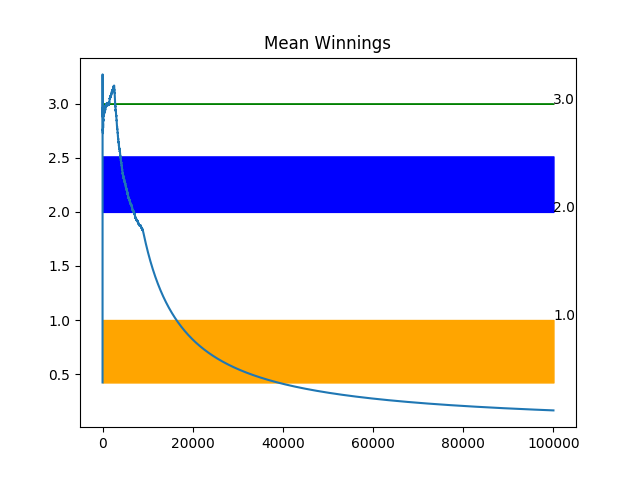

0.422405178206 1.0
2.51320349241 2.0
3.00057766561 3.0


In [10]:
true_means = [1.0, 2.0, 3.0]
oiv = run_experiment(true_means, 100000,10.)